In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('train.csv',engine='python')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df = df.sample(30000)

In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

is_duplicate
0    18884
1    11116
Name: count, dtype: int64
is_duplicate
0    62.946667
1    37.053333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

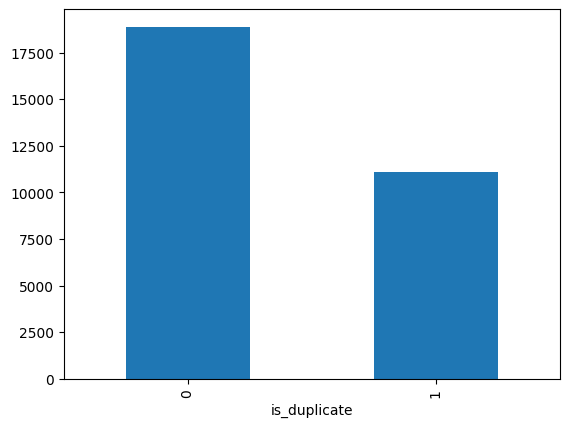

In [ ]:
# plot of duplicate value

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])

x = qid.value_counts()>1
print('number of questions repeated',x[x].shape[0])

Number of unique questions 55452
number of questions repeated 3411


[]

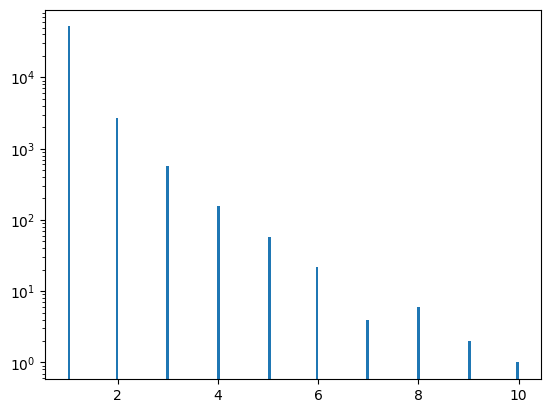

In [ ]:
plt.hist(qid.value_counts(),bins=160)
plt.yscale('log')
plt.plot()

In [ ]:
# creating new rows
# Feature engineering
# common_features


In [ ]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
df['q1_words'] = df['question1'].apply(lambda row:len(row.split(" ")))
df['q2_words'] = df['question2'].apply(lambda row:len(row.split(" ")))

In [ ]:
def most_common(row):
  w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(most_common,axis=1)


In [ ]:
def word_total(row):
  w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(word_total,axis= 1)

In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)

In [ ]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share
42342,42342,76315,76316,Does God play dice with the world?,Does God play dice?,1,34,19,7,4,3,11,0.27


<ipython-input-91-ebea7363f77a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
<ipython-input-91-ebea7363f77a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')


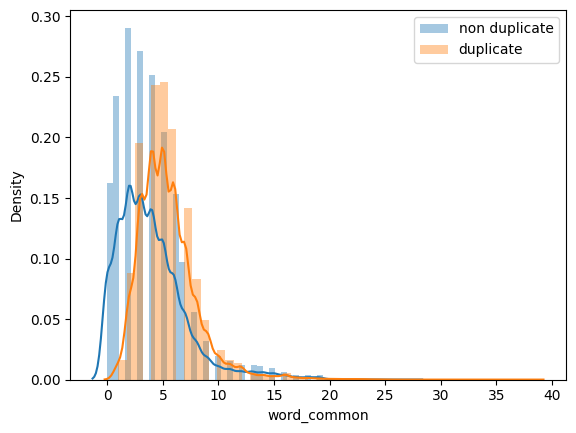

In [ ]:
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-92-7c69c20c4ada>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
<ipython-input-92-7c69c20c4ada>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')


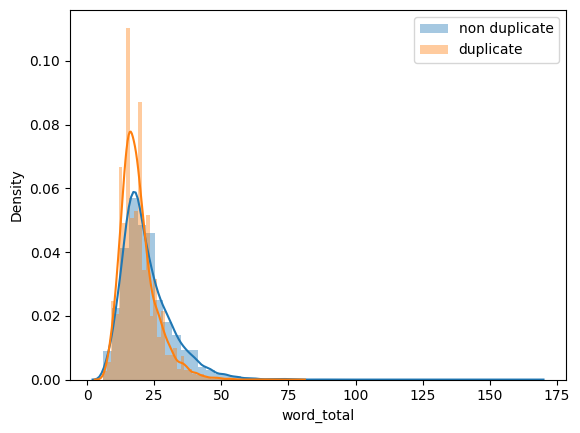

In [ ]:
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-49-e7d4cadcaea5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
<ipython-input-49-e7d4cadcaea5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')


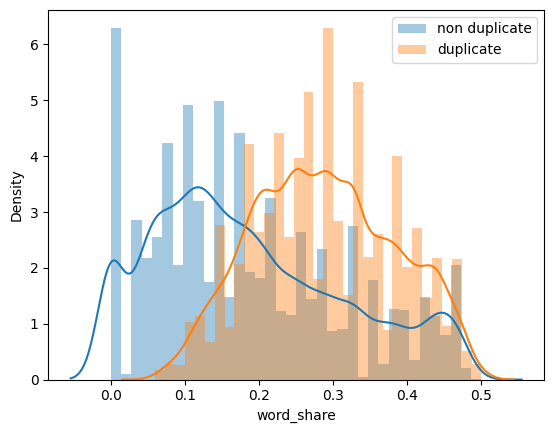

In [ ]:
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
# Advance features

def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
      if word in contractions:
        word = contractions[word]

      q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share
314354,314354,383532,439072,What is self confidence?,What does your self confidence depend on?,0,24,41,4,7,2,11,0.18


In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

<ipython-input-17-3a58e05bf0e4>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [ ]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
df['q1_words'] = df['question1'].apply(lambda x:len(x.split(" ")))
df['q2_words'] = df['question2'].apply(lambda x:len(x.split(" ")))

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words,axis = 1)

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words,axis=1)

In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)


In [ ]:
from nltk.corpus import stopwords

def token_features(row):

  q1 = row['question1']
  q2 = row['question2']

  q1_tokens = q1.split()
  q2_tokens = q2.split()

  safe_div = 0.1
  stop_word = stopwords.words('english')

  token_feature = [0.0]*8

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_feature

  q1_words = set([word for word in q1_tokens if word not in stop_word])
  q2_words = set([word for word in q2_tokens if word not in stop_word])

  q1_stop = set([word for word in q1_tokens if word in stop_word])
  q2_stop = set([word for word in q2_tokens if word in stop_word])

  common_word_count = len(q1_words.intersection(q2_words))

  common_stop_count = len(q1_stop.intersection(q2_stop))

  common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

  token_feature[0] = common_word_count / (min(len(q1_words),len(q2_words)) + safe_div)
  token_feature[1] = common_word_count / (max(len(q1_words),len(q2_words)) + safe_div)
  token_feature[2] = common_stop_count / (min(len(q1_stop),len(q2_stop)) + safe_div)
  token_feature[3] = common_stop_count / (max(len(q1_stop),len(q2_stop)) + safe_div)
  token_feature[4] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + safe_div)
  token_feature[5] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + safe_div)


  # Last word of both question is same or not
  token_feature[6] = int(q1_tokens[-1] == q2_tokens[-1])

  # First word of both question is same or not
  token_feature[7] = int(q1_tokens[0] == q2_tokens[0])

  return token_feature



In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
token_feature = df.apply(token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_feature))
df["cwc_max"]       = list(map(lambda x: x[1], token_feature))
df["csc_min"]       = list(map(lambda x: x[2], token_feature))
df["csc_max"]       = list(map(lambda x: x[3], token_feature))
df["ctc_min"]       = list(map(lambda x: x[4], token_feature))
df["ctc_max"]       = list(map(lambda x: x[5], token_feature))
df["last_word_eq"]  = list(map(lambda x: x[6], token_feature))
df["first_word_eq"] = list(map(lambda x: x[7], token_feature))

In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=db07ae580b9bbf81cc7e304eaa661f9f5e281053f65f3d1471a085a1382fcb66
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
import distance

def length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
length_features = df.apply(length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
df.head()
df.shape

(30000, 28)

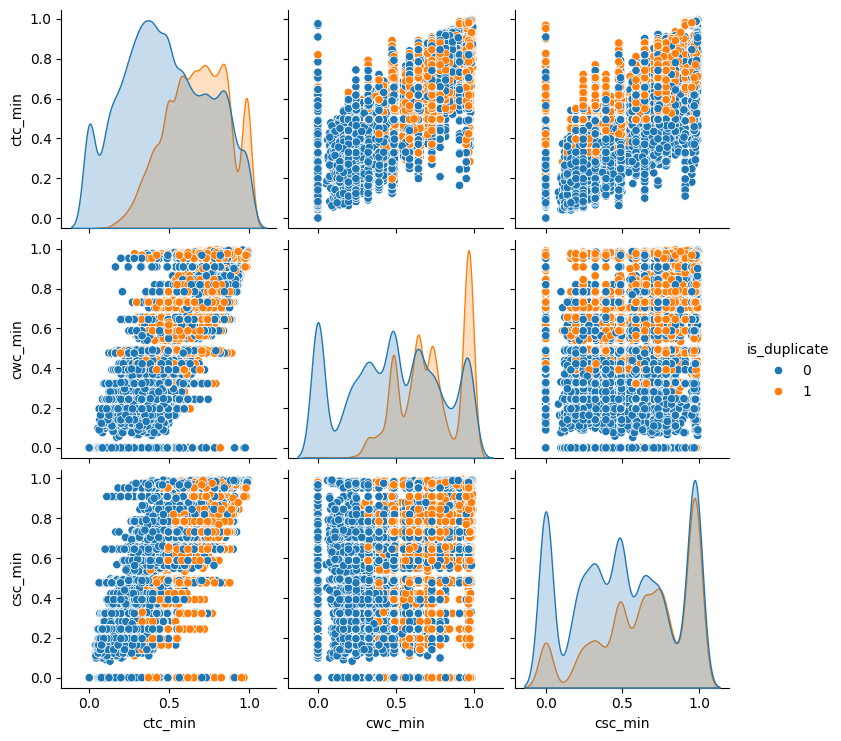

In [ ]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

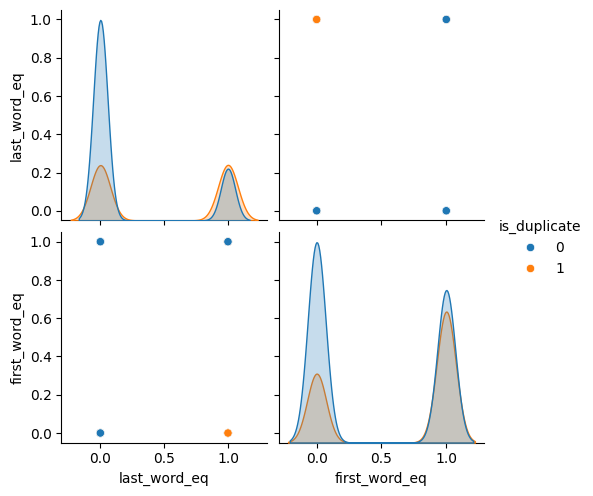

In [ ]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


In [ ]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
314354,0,23,40,4,7,3,11,0.27,0.952381,0.645161,...,0.731707,0.0,1.0,3.0,5.5,0.666667,70,74,70,93
111260,0,313,134,66,28,14,69,0.20,0.396040,0.199005,...,0.498084,0.0,1.0,35.0,43.5,0.096296,22,37,41,61
349188,0,52,103,12,25,4,31,0.13,0.588235,0.270270,...,0.330579,0.0,0.0,11.0,17.5,0.188679,21,31,47,49
21068,0,43,31,9,6,3,15,0.20,0.645161,0.487805,...,0.491803,0.0,0.0,3.0,7.5,0.343750,57,69,70,73
184767,0,79,76,17,17,16,34,0.47,0.864198,0.864198,...,0.931677,1.0,1.0,0.0,16.0,0.740260,95,93,94,98


In [ ]:
questions = list(df['question1']) + list(df['question2'])
tf = TfidfVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(tf.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= df.index)
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
314354,0,23,40,4,7,3,11,0.27,0.952381,0.645161,...,0.0,0.0,0.0,0.0,0.0,0.335924,0.0,0.0,0.0,0.0
111260,0,313,134,66,28,14,69,0.20,0.396040,0.199005,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
349188,0,52,103,12,25,4,31,0.13,0.588235,0.270270,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
21068,0,43,31,9,6,3,15,0.20,0.645161,0.487805,...,0.0,0.0,0.0,0.0,0.0,0.380941,0.0,0.0,0.0,0.0
184767,0,79,76,17,17,16,34,0.47,0.864198,0.864198,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7916666666666666

In [ ]:
import pickle

In [ ]:
filename = 'model.pkl'
pickle.dump(xgb,open(filename,'wb'))

## Model deployment

In [ ]:
#!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import streamlit as st
import pickle
import helper

In [ ]:
#model = pickle.load(open(filename,'rb'))



2024-09-20 03:11:32.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:11:32.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
#

2024-09-20 03:19:38.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.336 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 03:19:38.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar